In [1]:
import numpy as np
import qforte as qf

import matplotlib.pyplot as plt
from read_data import read_qite as read
from geometries.ene import get_geom as ene

In [2]:
print('\nBuild Geometry')
print('-------------------------')

symm_str = 'c1'
fdocc = 0
fuocc = 0

basis_set = 'cc-pvdz'
avas_atoms_and_atomic_orbs = ['C 2pz']

## ====> Build Qforte Mol with PySCF (using AVAS) <==== ###
mol_8 = qf.system_factory(
    build_type='pyscf', 
    symmetry=symm_str,
    mol_geometry=ene(variant='8-ene'), 
    basis=basis_set, 
    run_fci=True, 
    use_avas=True, #                     <=====
    avas_atoms_or_orbitals=avas_atoms_and_atomic_orbs,
    run_ccsd=False,
    store_mo_ints=True,
    build_df_ham=False,
    num_frozen_uocc = fuocc,
    num_frozen_docc = fdocc,
    build_qb_ham = False,
    )


print(f'The FCI energy from Pyscf:         {mol_8.fci_energy:12.10f}')
print(f'The SCF energy from Pyscf:         {mol_8.hf_energy:12.10f}')



Build Geometry
-------------------------
 ==> PySCF geometry <==
-------------------------

C  +0.335863334534  -0.638024393629  +0.000000000000
H  +1.432938652990  -0.620850836653  +0.000000000000
C  -0.296842857597  -1.839541058429  +0.000000000000
H  -1.393739535698  -1.860704460450  +0.000000000000
C  +0.383204712221  -3.118962195977  +0.000000000000
H  +1.479554414548  -3.087255036285  +0.000000000000
C  -0.237579216697  -4.313790116847  +0.000000000000
H  +0.325161369217  -5.249189992705  +0.000000000000
H  -1.329245260575  -4.386987278270  +0.000000000000
C  -0.335863334534  +0.638024393629  +0.000000000000
H  -1.432938652990  +0.620850836653  +0.000000000000
C  +0.296842857597  +1.839541058429  +0.000000000000
H  +1.393739535698  +1.860704460450  +0.000000000000
C  -0.383204712221  +3.118962195977  +0.000000000000
H  -1.479554414548  +3.087255036285  +0.000000000000
C  +0.237579216697  +4.313790116847  +0.000000000000
H  +1.329245260575  +4.386987278270  +0.000000000000
H  -0.

In [3]:
SD_path = '/home/vlita/2025_sqite/ene/eight/qite_SD_selected_pool_False_t_1e-06_dfham_False_summary.dat'

t1_path = '/home/vlita/2025_sqite/ene/eight/qite_All_selected_pool_True_t_1e-06_dfham_False_summary.dat'
t2_path = '/home/vlita/2025_sqite/ene/eight/qite_All_selected_pool_True_t_1e-07_dfham_False_summary.dat'
t3_path = '/home/vlita/2025_sqite/ene/eight/qite_All_selected_pool_True_t_1e-08_dfham_False_summary.dat'
t4_path = '/home/vlita/2025_sqite/ene/eight/qite_All_selected_pool_True_t_5e-08_dfham_False_summary.dat'
t5_path = '/home/vlita/2025_sqite/ene/eight/qite_All_selected_pool_True_t_5e-09_dfham_False_summary.dat'

t1_path_df = '/home/vlita/2025_sqite/ene/eight/qite_All_selected_pool_True_t_1e-06_dfham_True_summary.dat'
t2_path_df = '/home/vlita/2025_sqite/ene/eight/qite_All_selected_pool_True_t_1e-07_dfham_True_summary.dat'
t3_path_df = '/home/vlita/2025_sqite/ene/eight/qite_All_selected_pool_True_t_1e-08_dfham_True_summary.dat'
t4_path_df = '/home/vlita/2025_sqite/ene/eight/qite_All_selected_pool_True_t_5e-08_dfham_True_summary.dat'
t5_path_df = '/home/vlita/2025_sqite/ene/eight/qite_All_selected_pool_True_t_5e-09_dfham_True_summary.dat'


In [4]:
SD_b, SD_e, SD_p, SD_c, SD_m = read(SD_path)

t1_b, t1_e, t1_p, t1_c, t1_m = read(t1_path)
t2_b, t2_e, t2_p, t2_c, t2_m = read(t2_path)
t3_b, t3_e, t3_p, t3_c, t3_m = read(t3_path)
t4_b, t4_e, t4_p, t4_c, t4_m = read(t4_path)
t5_b, t5_e, t5_p, t5_c, t5_m = read(t5_path)

t1_df_b, t1_df_e, t1_df_p, t1_df_c, t1_df_m = read(t1_path_df)
t2_df_b, t2_df_e, t2_df_p, t2_df_c, t2_df_m = read(t2_path_df)
t3_df_b, t3_df_e, t3_df_p, t3_df_c, t3_df_m = read(t3_path_df)
t4_df_b, t4_df_e, t4_df_p, t4_df_c, t4_df_m = read(t4_path_df)
t5_df_b, t5_df_e, t5_df_p, t5_df_c, t5_df_m = read(t5_path_df)


SD_e = [abs(float(item) - mol_8.fci_energy) for item in SD_e]

t1_e = [abs(float(item) - mol_8.fci_energy) for item in t1_e]
t2_e = [abs(float(item) - mol_8.fci_energy) for item in t2_e]
t3_e = [abs(float(item) - mol_8.fci_energy) for item in t3_e]
t4_e = [abs(float(item) - mol_8.fci_energy) for item in t4_e]
t5_e = [abs(float(item) - mol_8.fci_energy) for item in t5_e]

t1_df_e = [abs(float(item) - mol_8.fci_energy) for item in t1_df_e]
t2_df_e = [abs(float(item) - mol_8.fci_energy) for item in t2_df_e]
t3_df_e = [abs(float(item) - mol_8.fci_energy) for item in t3_df_e]
t4_df_e = [abs(float(item) - mol_8.fci_energy) for item in t4_df_e]
t5_df_e = [abs(float(item) - mol_8.fci_energy) for item in t5_df_e]

SD_m = [int(item) for item in SD_m]

t1_m = [int(item) for item in t1_m]
t2_m = [int(item) for item in t2_m]
t3_m = [int(item) for item in t3_m]
t4_m = [int(item) for item in t4_m]
t5_m = [int(item) for item in t5_m]

t1_df_m = [int(item) for item in t1_df_m]
t2_df_m = [int(item) for item in t2_df_m]
t3_df_m = [int(item) for item in t3_df_m]
t4_df_m = [int(item) for item in t4_df_m]
t5_df_m = [int(item) for item in t5_df_m]

SD_c = [int(item) for item in SD_c]

t1_c = [int(item) for item in t1_c]
t2_c = [int(item) for item in t2_c]
t3_c = [int(item) for item in t3_c]
t4_c = [int(item) for item in t4_c]
t5_c = [int(item) for item in t5_c]

t1_df_c = [int(item) for item in t1_df_c]
t2_df_c = [int(item) for item in t2_df_c]
t3_df_c = [int(item) for item in t3_df_c]
t4_df_c = [int(item) for item in t4_df_c]
t5_df_c = [int(item) for item in t5_df_c]


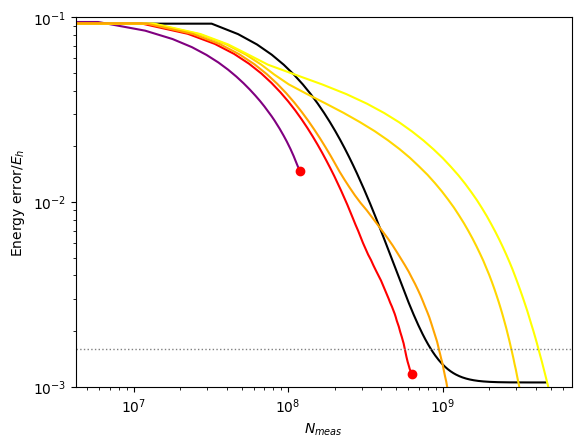

In [6]:
# Plot 1: Energy Error vs m
plt.figure()
plt.xscale('log')
plt.yscale('log')

plt.plot(SD_m, SD_e, linestyle='-', color='black', label='SD')
plt.plot(t1_m, t1_e, linestyle='-', color='purple', label='t1')
plt.plot(t2_m, t2_e, linestyle='-', color='red', label='t2 = 1.0e-6')
plt.plot(t3_m, t3_e, linestyle='-', color='gold', label='t3 = 1.0e-7')
plt.plot(t5_m, t5_e, linestyle='-', color='yellow', label='t5 = 5.0e-8')
plt.plot(t4_m, t4_e, linestyle='-', color='orange', label='t4 = 1.0e-8')


plt.plot(t1_m[-1], t1_e[-1], 'ro', label='Converged')  # red circle
plt.plot(t2_m[-1], t2_e[-1], 'ro', label='Converged')  # red circle

plt.axhline(y=1.6e-3, color='gray', linestyle=':', linewidth=1, label='Chemical Accuracy')

plt.xlabel('$N_{meas}$')
plt.ylabel('Energy error/$E_h$')

# Set xticks every 5000
# xticks = np.arange(0, max(max(SD_m), max(t1_m), max(t2_m), max(t3_m)) + 1, 5000)
# plt.xticks(xticks)

# plt.xlim(1e-3, 0)
plt.ylim(1e-3, 1e-1)


# plt.legend()
# plt.grid(True)
plt.show()

/tmp/ipykernel_2834242/1660310935.py:38: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(1e-3, 0)


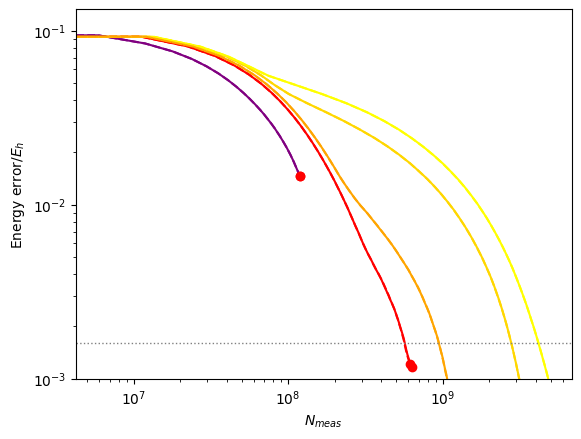

In [7]:
# Plot 1: Energy Error vs m
plt.figure()
plt.xscale('log')
plt.yscale('log')

# plt.plot(SD_m, SD_e, linestyle='-', color='black', label='SD')
plt.plot(t1_m, t1_e, linestyle='-', color='purple', label='t1')
plt.plot(t2_m, t2_e, linestyle='-', color='red', label='t2 = 1.0e-6')
plt.plot(t3_m, t3_e, linestyle='-', color='gold', label='t3 = 1.0e-7')
plt.plot(t5_m, t5_e, linestyle='-', color='yellow', label='t5 = 5.0e-8')
plt.plot(t4_m, t4_e, linestyle='-', color='orange', label='t4 = 1.0e-8')


plt.plot(t1_m[-1], t1_e[-1], 'ro', label='Converged')  # red circle
plt.plot(t2_m[-1], t2_e[-1], 'ro', label='Converged')  # red circle

plt.plot(t1_df_m, t1_df_e, linestyle='--', color='purple', label='t1')
plt.plot(t2_df_m, t2_df_e, linestyle='--', color='red', label='t2 = 1.0e-6')
plt.plot(t3_df_m, t3_df_e, linestyle='--', color='gold', label='t3 = 1.0e-7')
plt.plot(t5_df_m, t5_df_e, linestyle='--', color='yellow', label='t5 = 5.0e-8')
plt.plot(t4_df_m, t4_df_e, linestyle='--', color='orange', label='t4 = 1.0e-8')


plt.plot(t1_df_m[-1], t1_df_e[-1], 'ro', label='Converged')  # red circle
plt.plot(t2_df_m[-1], t2_df_e[-1], 'ro', label='Converged')  # red circle

plt.axhline(y=1.6e-3, color='gray', linestyle=':', linewidth=1, label='Chemical Accuracy')

plt.xlabel('$N_{meas}$')
plt.ylabel('Energy error/$E_h$')


# Set xticks every 5000
# xticks = np.arange(0, max(max(SD_m), max(t1_m), max(t2_m), max(t3_m)) + 1, 5000)
# plt.xticks(xticks)

# plt.xlim(1e-3, 0)
plt.ylim(1e-3, 0)


# plt.legend()
# plt.grid(True)
plt.show()

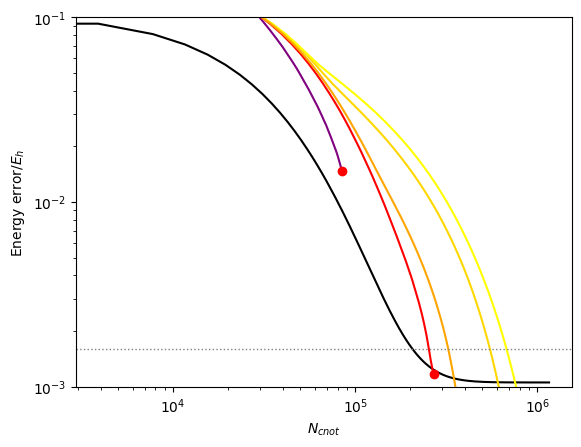

In [8]:
# Plot 1: Energy Error vs m
plt.figure()
plt.xscale('log')
plt.yscale('log')

plt.plot(SD_c, SD_e, linestyle='-', color='black', label='SD')
plt.plot(t1_c, t1_e, linestyle='-', color='purple', label='t1')
plt.plot(t2_c, t2_e, linestyle='-', color='red', label='t2 = 1.0e-6')
plt.plot(t3_c, t3_e, linestyle='-', color='gold', label='t3 = 1.0e-7')
plt.plot(t5_c, t5_e, linestyle='-', color='yellow', label='t5 = 5.0e-8')
plt.plot(t4_c, t4_e, linestyle='-', color='orange', label='t4 = 1.0e-8')


plt.plot(t1_c[-1], t1_e[-1], 'ro', label='Converged')  # red circle
plt.plot(t2_c[-1], t2_e[-1], 'ro', label='Converged')  # red circle

plt.axhline(y=1.6e-3, color='gray', linestyle=':', linewidth=1, label='Chemical Accuracy')

plt.xlabel('$N_{cnot}$')
plt.ylabel('Energy error/$E_h$')

# Set xticks every 5000
# xticks = np.arange(0, max(max(SD_m), max(t1_m), max(t2_m), max(t3_m)) + 1, 5000)
# plt.xticks(xticks)

# plt.xlim(1e-3, 0)
plt.ylim(1e-3, 1e-1)


# plt.legend()
# plt.grid(True)
plt.show()

/tmp/ipykernel_815141/4265392894.py:38: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(1e-3, 0)


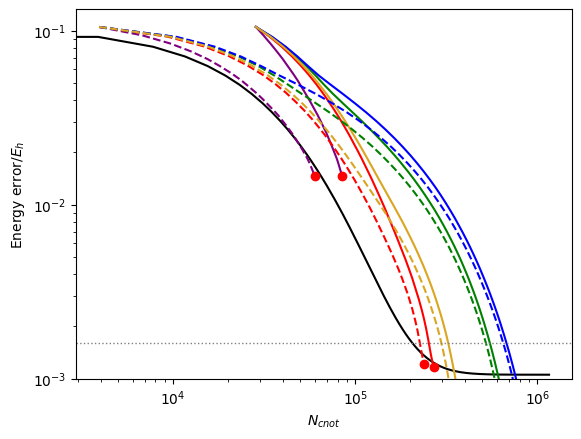

In [7]:
# Plot 1: Energy Error vs m
plt.figure()
plt.xscale('log')
plt.yscale('log')

plt.plot(SD_c, SD_e, linestyle='-', color='black', label='SD')
plt.plot(t1_c, t1_e, linestyle='-', color='purple', label='t1')
plt.plot(t2_c, t2_e, linestyle='-', color='red', label='t2 = 1.0e-6')
plt.plot(t3_c, t3_e, linestyle='-', color='green', label='t3 = 1.0e-7')
plt.plot(t5_c, t5_e, linestyle='-', color='blue', label='t5 = 5.0e-8')
plt.plot(t4_c, t4_e, linestyle='-', color='goldenrod', label='t4 = 1.0e-8')


plt.plot(t1_c[-1], t1_e[-1], 'ro', label='Converged')  # red circle
plt.plot(t2_c[-1], t2_e[-1], 'ro', label='Converged')  # red circle

plt.plot(t1_df_c, t1_df_e, linestyle='--', color='purple', label='t1')
plt.plot(t2_df_c, t2_df_e, linestyle='--', color='red', label='t2 = 1.0e-6')
plt.plot(t3_df_c, t3_df_e, linestyle='--', color='green', label='t3 = 1.0e-7')
plt.plot(t5_df_c, t5_df_e, linestyle='--', color='blue', label='t5 = 5.0e-8')
plt.plot(t4_df_c, t4_df_e, linestyle='--', color='goldenrod', label='t4 = 1.0e-8')


plt.plot(t1_df_c[-1], t1_df_e[-1], 'ro', label='Converged')  # red circle
plt.plot(t2_df_c[-1], t2_df_e[-1], 'ro', label='Converged')  # red circle

plt.axhline(y=1.6e-3, color='gray', linestyle=':', linewidth=1, label='Chemical Accuracy')

plt.xlabel('$N_{cnot}$')
plt.ylabel('Energy error/$E_h$')


# Set xticks every 5000
# xticks = np.arange(0, max(max(SD_m), max(t1_m), max(t2_m), max(t3_m)) + 1, 5000)
# plt.xticks(xticks)

# plt.xlim(1e-3, 0)
plt.ylim(1e-3, 0)


# plt.legend()
# plt.grid(True)
plt.savefig(fname='dfham_plot.png', dpi=300)